In [1]:
# n'exécuter qu'une fois
!pip3 install seaborn numpy matplotlib pandas mca

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

# TP AFC / ACM

# Exercice 1 : Analyse Factorielle des Correspondances
Le fichier de données est un tableau d'effectifs, croisant l'origine sociale des sondés (CSP, version simplifiée) avec les médias d'informations utilisés

In [3]:
media = pd.read_table("./data/mediaCSP.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")
print(media)

                Radio  Tel.  Quot.Nat.  Quot.Reg.  Press.Mag.  Press.TV
Prof                                                                   
Agriculteur        96   118          2         71          50        17
Petit.Patr.       122   136         11         76          49        41
Prof.Cad.Sup      193   184         74         63         103        79
Prof.Int.         360   365         63        145         141       184
Employe           511   593         57        217         172       306
Ouvr.Qualif.      385   457         42        174         104       220
Ouvr.Non-Qual.    156   185          8         69          42        85
Inactif          1474  1931        181        852         642       782


## ===== Votre travail : =====
Vous avez à disposition un fichier ca.py, permettant de réaliser les calculs relatifs à une analyse factorielle des correspondances. L'objectif est de répondre aux questions suivantes : 
- Quelle est la structure des moyens d'information choisis selon la CSP ? (profils lignes).
- La structure est-elle différente d’une CSP à l’autre ?
- Les médias sont-ils différents en termes de CSP ? (profils colonnes)
- Existe-t-il des relations entre CSP et médias  (des CSP ont-elles une préférences pour certains médias ? Certains médias attirent-ils des catégories particulières de CSP ?)

### Analyse Factorielle des correspondances

On créé une instance de l'objet CA, que l'on applique sur le tableau des valeurs

In [4]:
from ca import CA
afc = CA(row_labels=media.index,col_labels=media.columns)
afc.fit(media.values)

CA(col_labels=Index(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.', 'Press.TV'], dtype='object'),
   row_labels=Index(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.', 'Employe',
       'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype='object', name='Prof'))

### Valeurs propres
En utilisant l'attribut $eig\_$ et la fonction plot_eigenvalues (ligne 294 du fichier $base.py$),afficher et interpréter les valeurs propres issues de l'analyse factorielle (nombre, contribution des facteurs...)

In [5]:
#TODO


In [6]:
#TODO

### Analyse des profils lignes
On affiche ici, pour chaque modalité ligne, la distribution des individus colonnes

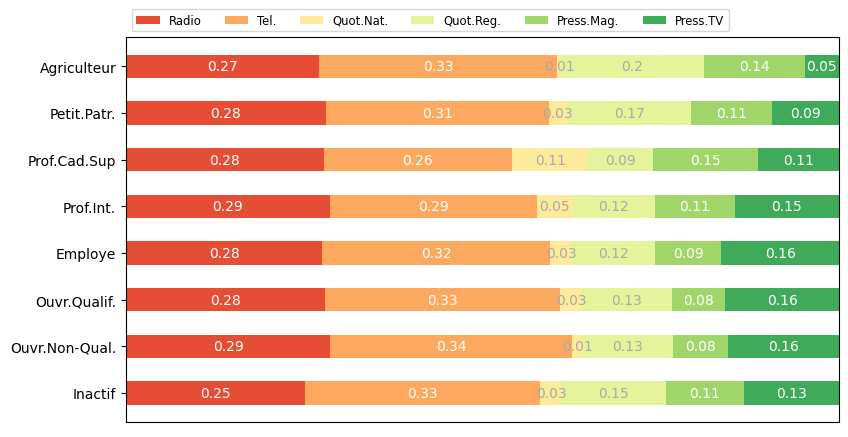

In [7]:

data = np.apply_along_axis(arr=media.values,axis=1,func1d=lambda x:x/np.sum(x))
data_cum = data.cumsum(axis=1)
labels = list(media.index)
colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(list(afc.col_labels_short_.values), colors)):
    widths = data[:,i]
    starts = data_cum[:,i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):

        ax.text(x, y, str(float(round(c,2))), ha='center', va='center',
                    color=text_color)
ax.legend(ncol=len(afc.col_labels_short_.values), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.show()

En utilisant l'attribut row\_coord\_, afficher les coordonnées des modalités lignes par facteur. Calculer la moyenne pondérée et la variance des coordonnées des modalités lignes sur le premier facteur. Qu'obtenez-vous ?

In [8]:
#TODO

In [9]:
#TODO

Moyenne :  1.3877787807814457e-17  égale à 0

Variance :  0.013857286816774693 égale à la valeur propre associée

En utilisant la fonction mapping\_row (ligne 389, ficher base.py), représenter les individus lignes dans le premier plan factoriel (qui restitue 94.5\% de l'information disponible). Analyser le résultat

In [10]:
#TODO

### Calcul de la distance du $\chi^2$
La distance du $\chi^2$ entre les modalités lignes dans l’espace initial devient distance euclidienne dans l’espace factoriel. Comme en ACP, la restitution est parfaite lorsque tous les facteurs sont pris en compte, et approchée si une partie est utilisée. La précision dépend alors d’une part de la qualité de restitution du repère factoriel choisi, d’autre part de la qualité de représentation des modalités impliquées dans le calcul (les $cos^2$).

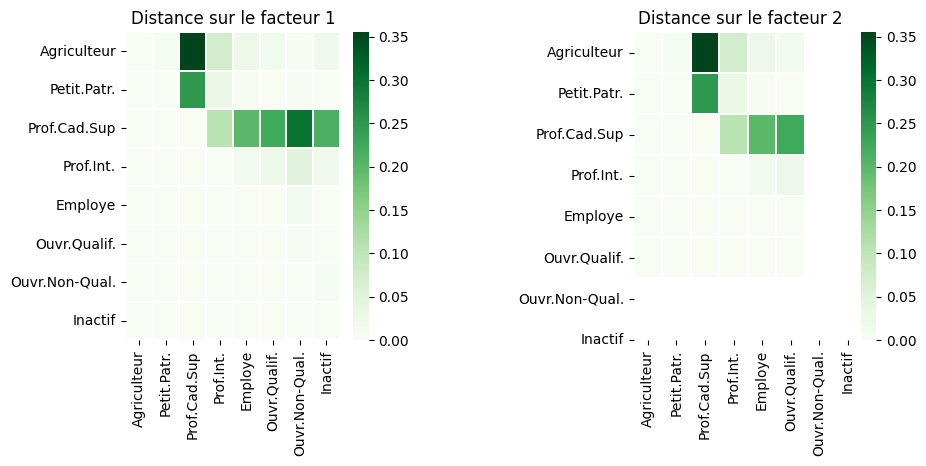

In [11]:
f,ax = plt.subplots(1, 2,figsize=(10,4))

for l in range(0,2):

    # Distances entre modalités sur le l-eme facteur
    plt.subplot(1,2,l+1)
    distPairesLigF1 = np.zeros(shape=(data.shape[l],data.shape[l]))
    for i in range(data.shape[l]-1):
        for j in range(i+1,data.shape[l]):
            distPairesLigF1[i,j] = np.sum((afc.row_coord_[i,0]-afc.row_coord_[j,0])**2) 
    sns.heatmap(distPairesLigF1,vmin=0,vmax=np.max(distPairesLigF1),linewidth=0.1,cmap= 'Greens',xticklabels=media.index,yticklabels=media.index)
    plt.title("Distance sur le facteur "+str(l+1))
f.subplots_adjust(wspace=0.9)


### Analyse des profils colonnes
Faire la même analsye sur les profils colonnes. Interpréter les résultats

In [12]:
#TODO

### Analyse de l'association lignes-colonnes
Au-delà de la comparaison des profils, l’intérêt majeur de l’AFC est d’identifier les associations entre les modalités lignes et colonnes : est ce que les agriculteurs s'informent plus par la radio que les autres ? Est ce que la presse magazine attire plus les cadres ?

Avant de s’intéresser aux relations entre les modalités, il faut déjà vérifier qu’il existe bien une liaison exploitable entre les variables en ligne et colonne du tableau de contingence. La statistique du $\chi^2$ de l'écart à l'indépendance permet de le faire

Faire un test du $\chi^2$ (voir le cours statistiques bivariées), en utilisant la fonction [$scipy.stats.chi2.cdf$](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) du module $scipy$. Conclure.

In [13]:
#TODO

Le test conduit au rejet de l'hypothèse nulle : les variables lignes et colonnes sont donc manifestement fortement liées.



Pour approfondir la nature des relations entre les modalités lignes et colonnes du tableau, on peut calculer l'indice d'attraction / répulsion, défini par 
$$\frac{P(Y=y_k, X=x_l)}{P(Y=y_k)P(X=x_l)}$$

où $x_l$ et $y_k$ sont les profils ligne et colonne. En pratique, cet indice est calculé comme le rapport entre les effectifs observés et théoriques : s'il est supérieur à 1, il y a une attraction ; sinon il y a répulsion entre les modalités.

Calculer cet indice, effectuer uin test du $\chi^2$ et conclure.

In [14]:
#TODO

### Représentation simultanée lignes/colonnes

En utilisant la fonction $mapping$ (ligne 329 du fichier base.py), projeter sur le premier plan factoriel les individus ligne et colonne. Interpreter.

In [15]:
#TODO

Comme en ACP où il est possible de reconstituer approximativement les données originelles à partir des coordonnées factorielles des individus, on peut approcher le tableau des indices d’attraction-répulsion $i_{kl}$ à partir des coordonnées factorielles des modalités lignes et colonnes : en reconstruisant à partir des $P$ premiers facteurs, si $F_{kp}$ ett $G_{lp}$ sont les coordonnées factorielles des modalités lignes et colonnes
$$i_{kl} = 1+\displaystyle\sum_{p=1}^P \frac{F_{kp}G_{lp}}{\sqrt{\lambda_p}}$$

Ainsi : 
- Deux modalités s’attirent (resp. se repoussent) si leurs coordonnées sont de même signe (resp. de signe contraire) sur les axes factoriels.
- Le trait est d’autant plus marqué que les valeurs des coordonnées sont élevées (en valeur absolue) c.-à-d. que les points sont situés aux extrémités des facteurs.
- Les  coordonnées doivent être relativisées par le pouvoir de restitution du facteur ($\lambda_h$).

Calculer l'approximation des inices d'attraction-répulsion à parit des données du premier facteur (P=1). Interpréter.



In [16]:
#TODO

# Exercice 2 : Analyse des Correspondances Multiples
Ici on s'intéresse à 6 traits de caractères de 27 races de chien, et on souhaite analyser le tableau par ACM

In [17]:
chiens = pd.read_table("./data/chiens.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")
print(chiens)  

                   Taille    Poids Velocite Intelligence Affection Agressivite
Chien                                                                         
Beauceron        Taille++   Poids+  Veloc++      Intell+    Affec+     Agress+
Basset            Taille-   Poids-   Veloc-      Intell-    Affec-     Agress+
Berger All       Taille++   Poids+  Veloc++     Intell++    Affec+     Agress+
Boxer             Taille+   Poids+   Veloc+      Intell+    Affec+     Agress+
Bull-Dog          Taille-   Poids-   Veloc-      Intell+    Affec+     Agress-
Bull-Mastif      Taille++  Poids++   Veloc-     Intell++    Affec-     Agress+
Caniche           Taille-   Poids-   Veloc+     Intell++    Affec+     Agress-
Chihuahua         Taille-   Poids-   Veloc-      Intell-    Affec+     Agress-
Cocker            Taille+   Poids-   Veloc-      Intell+    Affec+     Agress+
Colley           Taille++   Poids+  Veloc++      Intell+    Affec+     Agress-
Dalmatien         Taille+   Poids+   Veloc+      Int

On récupère les variables actives : on s'intéresse à un sous-ensemble de cardinal $k$ de variables du jeu de données (vous pouvez changer les variables utilisées).

In [18]:
var_chiens = chiens[['Taille','Velocite','Affection']] 

print(var_chiens)

                   Taille Velocite Affection
Chien                                       
Beauceron        Taille++  Veloc++    Affec+
Basset            Taille-   Veloc-    Affec-
Berger All       Taille++  Veloc++    Affec+
Boxer             Taille+   Veloc+    Affec+
Bull-Dog          Taille-   Veloc-    Affec+
Bull-Mastif      Taille++   Veloc-    Affec-
Caniche           Taille-   Veloc+    Affec+
Chihuahua         Taille-   Veloc-    Affec+
Cocker            Taille+   Veloc-    Affec+
Colley           Taille++  Veloc++    Affec+
Dalmatien         Taille+   Veloc+    Affec+
Doberman         Taille++  Veloc++    Affec-
Dogue-All        Taille++  Veloc++    Affec-
Epag.-Breton      Taille+   Veloc+    Affec+
Epag.-FranÃ§ais  Taille++   Veloc+    Affec-
Fox-Hound        Taille++  Veloc++    Affec-
Fox-Terrier       Taille-   Veloc+    Affec+
Gd-Bleu-Gasc     Taille++   Veloc+    Affec-
Labrador          Taille+   Veloc+    Affec+
Levrier          Taille++  Veloc++    Affec-
Mastiff   

## Analyse des individus

Dans la suite, on travaille sur le tableau disjonctif complet des données (variables transformées en indicatrices 0/1).

In [19]:
#codage en 0/1 des propriétés des chiens : tableau disjonctif complet
X = pd.get_dummies(var_chiens,prefix='',prefix_sep='')
n,p =  X.shape
print(X)

                 Taille+  Taille++  Taille-  Veloc+  Veloc++  Veloc-  Affec+  \
Chien                                                                          
Beauceron              0         1        0       0        1       0       1   
Basset                 0         0        1       0        0       1       0   
Berger All             0         1        0       0        1       0       1   
Boxer                  1         0        0       1        0       0       1   
Bull-Dog               0         0        1       0        0       1       1   
Bull-Mastif            0         1        0       0        0       1       0   
Caniche                0         0        1       1        0       0       1   
Chihuahua              0         0        1       0        0       1       1   
Cocker                 1         0        0       0        0       1       1   
Colley                 0         1        0       0        1       0       1   
Dalmatien              1         0      

## ===== Votre travail : =====
Vous avez à disposition un fichier mca.py, permettant de réaliser les calculs relatifs à une analyse des correspondances multiples
Faire une analyse en composantes multiples de ces données et plus précisément : 
- Déterminer l'importance des axes principaux calculés lors de l'ACP (attribut $eig\_$, descripion ligne 74 de mca.py).
- Déterminer les contributions des points lignes à la variance des axes (attribut r$ow\_contrib\_$, descripion ligne 86 de mca.py)
- Déterminer les contributions des points colonnes à la variance de l'axe (attribut $col\_contrib\_$, descripion ligne 90 de mca.py)
- Déterminer la qualité de représentation des des points lignes et colonnes (attributs $row\_cos2\_$ et $col\_cos2\_$, descripion lignes 94 et 97 de mca.py)
- Tracer la projection des points lignes et colonnes (fonctions $mapping$, $mapping\_row$ et $mapping\_col$ de mca.py) sur les plans princpaux
- Commenter l'ensemble de vos analyses


Calculer la distance entre individus : on utilise dans ce cas la distance du Chi2 sur modalités catégorielles (voir chapitre 1 du cours) qui met en valeur les différences entre les modalités rares 


<AxesSubplot:>

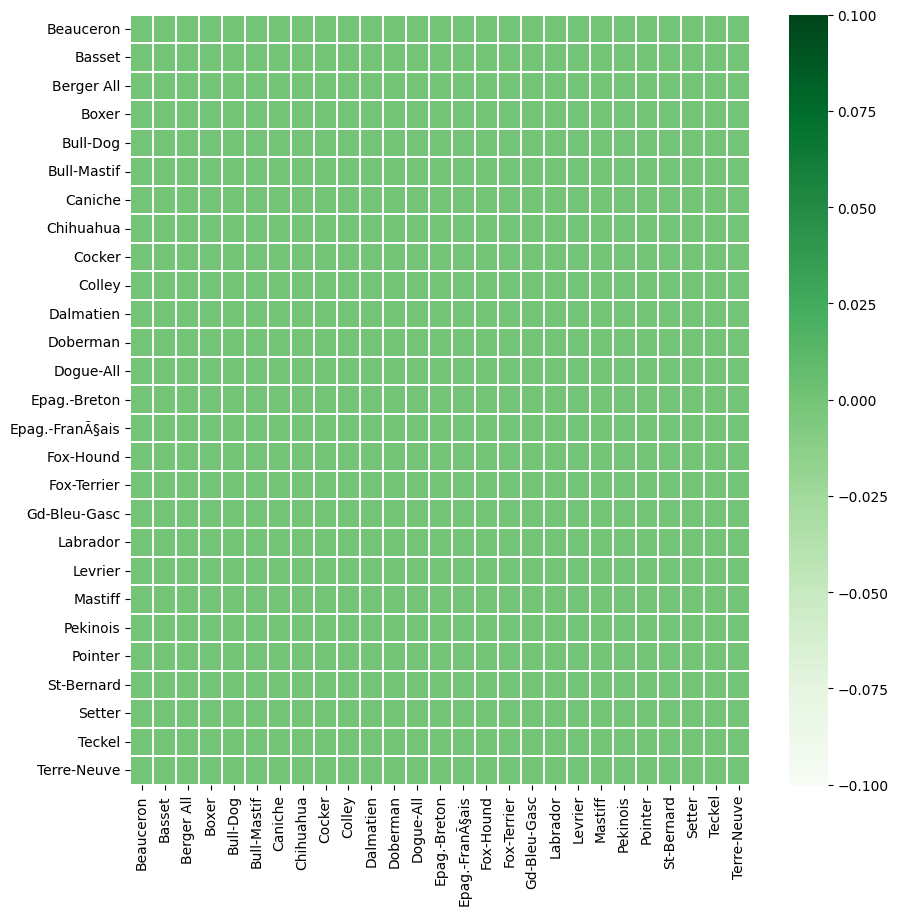

In [20]:
#profil individu moyen
ind_moy = np.sum(X.values,axis=0)/(n*p) 

distchi2 = np.zeros(shape=(n,n))

#TODO : calcul de la distance 

plt.figure(figsize=(10,10))
sns.heatmap(distchi2,vmin=0,vmax=np.max(distchi2),linewidth=0.1,cmap= 'Greens',xticklabels=chiens.index,yticklabels=chiens.index)

Ainsi, par exemple, le Basset a plus de caractères en commun avec le Caniche qu’avec le Beauceron.

Calculer la distance à l'origine (profil moyen). Interpréter 

<AxesSubplot:>

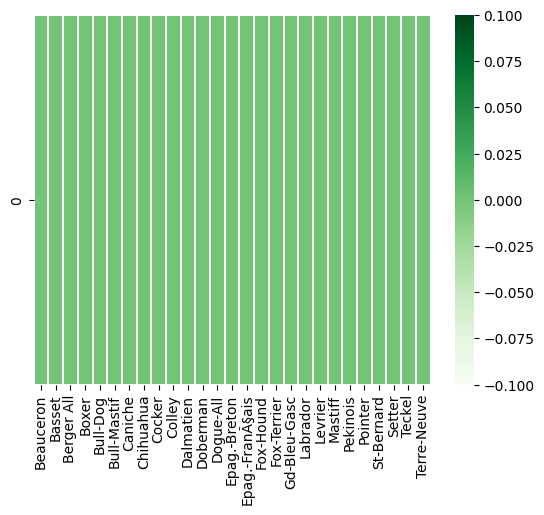

In [21]:
#profil moyen des variables-modalités
moda_moy = np.ones(X.shape[0])/n

distO = np.zeros(shape=(1,n))

#TODO : calcul de la distance

sns.heatmap(distO,vmin=0,vmax=np.max(distO),linewidth=0.1,cmap= 'Greens',xticklabels=X.index)


Ainsi par exemple, le Pointer est plus proche du chien moyen que le Cocker.

### Analyse des colonnes
L’analyse des associations entre les modalités revient à travailler sur les profils colonnes. Le tableau de données est normalisé par les sommes en colonne. Le profil moyen est égal au poids des observations 

<AxesSubplot:>

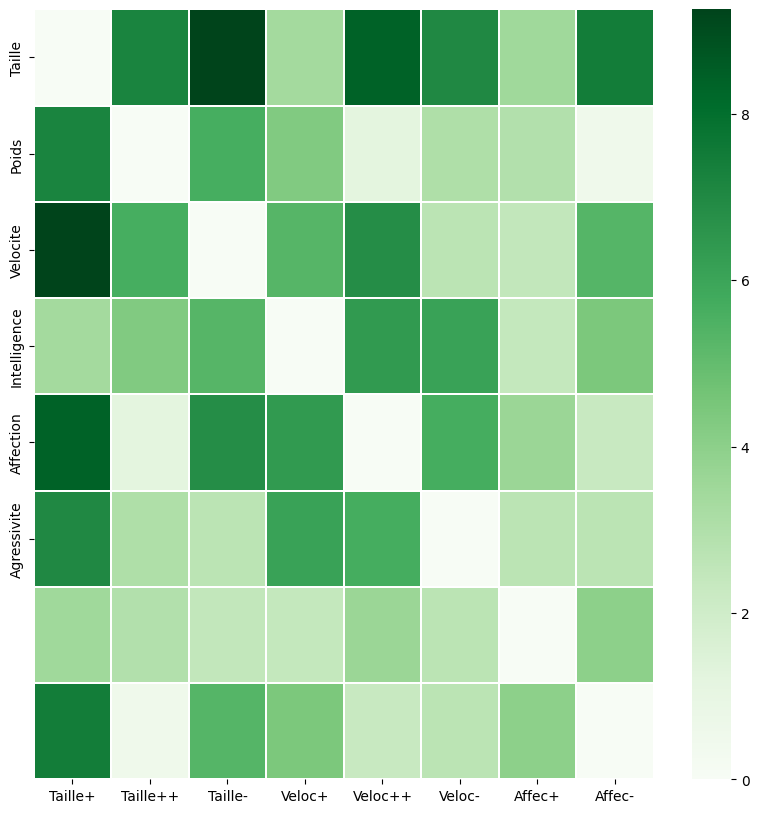

In [22]:
#somme en colonne
somme_col = np.sum(X.values,axis=0) 

n,p =  X.shape

#On utilise la distance du Chi2 sur modalités catégorielles qui met en valeur les différences entre les modalités rares 
dist = np.zeros(shape=(p,p))

for i in range(p-1):
    for j in range(i,p):
        dist[i,j] = dist[j,i] = np.sum(n*((X.values[:,i]/somme_col[i]-X.values[:,j]/somme_col[j])**2))

plt.figure(figsize=(10,10))
sns.heatmap(dist,vmin=0,vmax=np.max(dist),linewidth=0.1,cmap= 'Greens',xticklabels=X.columns,yticklabels=chiens.columns)



Calculer la distance à l'origine, qui  donne une information sur la fréquence de la modalité dans la base. Elle est définie par la disance du $\chi^2$ au profil moyen. Interpréter 

<AxesSubplot:>

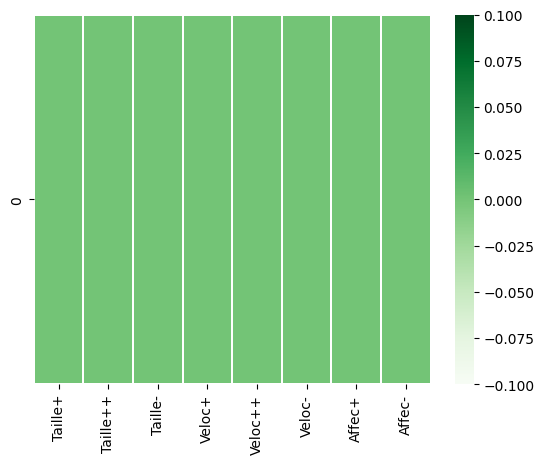

In [23]:
#profil moyen des variables-modalités
moda_moy = np.ones(X.shape[0])/n

distO = np.zeros(shape=(1,p))

#TODO calcul distance

sns.heatmap(distO,vmin=0,vmax=np.max(distO),linewidth=0.1,cmap= 'Greens',xticklabels=X.columns)


Ainsi, Veloc+ est moins présent que Veloc- dans les exemples.

### ACM

On créé une instance de l'objet MCA (défini dans mca.py) et on estime le modèle des correspondances multiples sur les données $X$


In [24]:
from mca import MCA
acm = MCA(row_labels=var_chiens.index, var_labels=var_chiens.columns)
acm.fit(var_chiens.values)

TypeError: __init__() got an unexpected keyword argument 'row_labels'

### Analyse des valeurs propres

L’objectif de l’Analyse des Correspondances Multiples est de décomposer l'information sur une succession d’axes factoriels orthogonaux. Le nouveau système de représentation est calculé pour préserver au mieux les distances entre individus. L nombre maximum de facteurs est $p-k$, où $p$ est la somme du nombre de modalités des variables (le nombre de colonnes de $X$), et $k$ le nombre de variables initiales.

De même que pour l'analyse facrtorielle, calculer les valeurs propres et interpréter les facteurs.

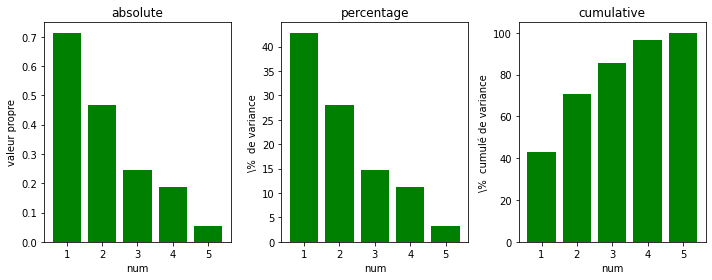

In [72]:
#TODO

### Représentation graphique


2 types de graphiques peuvent être réalisés :
- Les mappings classiques qui représentent les points lignes et colonnes sur un plan factoriel
- Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe


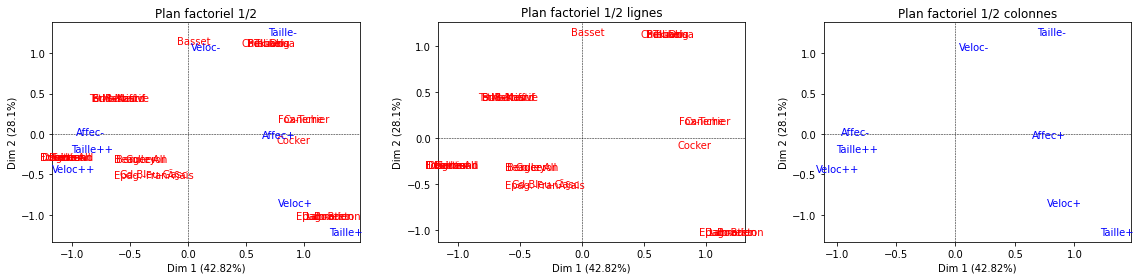

In [73]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,4))
acm.mapping(ax1,num_x_axis=1, num_y_axis=2)
acm.mapping_row(ax2,num_x_axis=1, num_y_axis=2)
acm.mapping_col(ax3,num_x_axis=1, num_y_axis=2)
f.subplots_adjust(wspace=0.52)
plt.tight_layout()


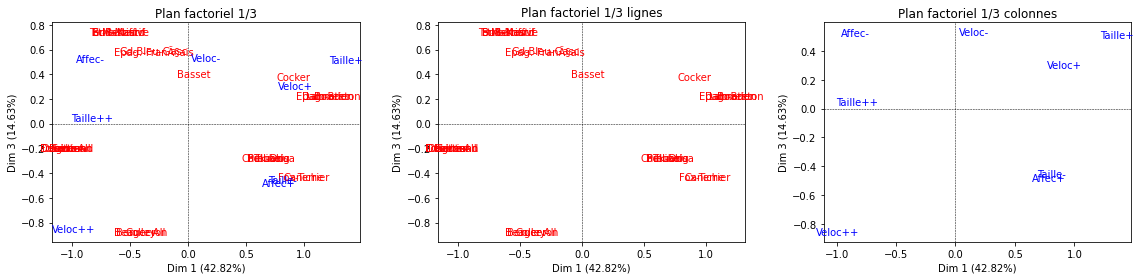

In [74]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,4))
acm.mapping(ax1,num_x_axis=1, num_y_axis=3)
acm.mapping_row(ax2,num_x_axis=1, num_y_axis=3)
acm.mapping_col(ax3,num_x_axis=1, num_y_axis=3)
f.subplots_adjust(wspace=0.52)
plt.tight_layout()

### Analyse du 1er axe

On utilise les formules de $cos^2$ pour mesurer la qualité de la projection des individus et des modalités sur les axes factoriels.
En pratique, si deux individus sont bien projetés alors s’ils sont proches en projections, ils sont effectivement proches dans leur espace d’origine et on peut alors interprèter leur proximité :

— La proximité entre deux individus s’interprète en terme de distance (du $\chi^2$) : deux individus se ressemblent s’ils ont choisis les mêmes modalités. 

— La proximité entre deux modalités de deux variables différentes s’interprète en terme de distance (du $\chi^2$) : deux modalités se ressemblent si elles sont possédées par les mêmes individus. 

On peut exhiber les coordonnées des individus sur les facteurs. Par exemple sur le premier facteur

In [75]:
print(pd.DataFrame(acm.row_coord_[:,0],index=var_chiens.index))


                        0
Chien                    
Beauceron       -0.410650
Basset           0.049305
Berger All      -0.410650
Boxer            1.207263
Bull-Dog         0.689967
Bull-Mastif     -0.598234
Caniche          0.991235
Chihuahua        0.689967
Cocker           0.905995
Colley          -0.410650
Dalmatien        1.207263
Doberman        -1.051312
Dogue-All       -1.051312
Epag.-Breton     1.207263
Epag.-FranÃ§ais -0.296967
Fox-Hound       -1.051312
Fox-Terrier      0.991235
Gd-Bleu-Gasc    -0.296967
Labrador         1.207263
Levrier         -1.051312
Mastiff         -0.598234
Pekinois         0.689967
Pointer         -1.051312
St-Bernard      -0.598234
Setter          -1.051312
Teckel           0.689967
Terre-Neuve     -0.598234


et de même pour les modalités

In [79]:
print(pd.DataFrame(acm.col_coord_[:,0],index=X.columns))



                 0
Taille+   1.357789
Taille++ -0.830741
Taille-   0.810311
Veloc+    0.920019
Veloc++  -0.991708
Veloc-    0.156521
Affec+    0.781744
Affec-   -0.841878
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
Taille+  &  1.357789 & -1.208698 &  0.511177 \\
Taille++ & -0.830741 & -0.183303 &  0.043597 \\
Taille-  &  0.810311 &  1.256148 & -0.458548 \\
Veloc+   &  0.920019 & -0.854578 &  0.301665 \\
Veloc++  & -0.991708 & -0.433463 & -0.855715 \\
Veloc-   &  0.156521 &  1.073779 &  0.528811 \\
Affec+   &  0.781744 & -0.020376 & -0.484442 \\
Affec-   & -0.841878 &  0.021943 &  0.521706 \\
\bottomrule
\end{tabular}



Calculer la moyenne des  coordonnées pour chaque variable. Qu'observez-vous ?

In [31]:
#TODO 

3.469446951953614e-18
-3.1803263726241462e-18
-6.938893903907228e-18


En utillisant les fonctions plot\_row\_contrib et plot\_row\_cos2 (voir fichier base.py), interpréter la contribution des individus aux deux premiers facteurs.

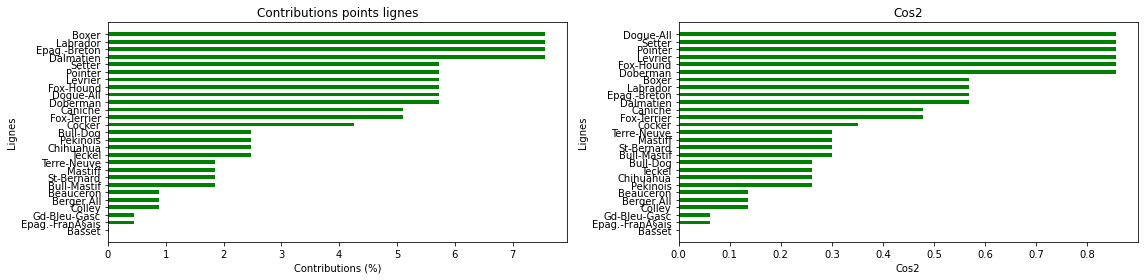

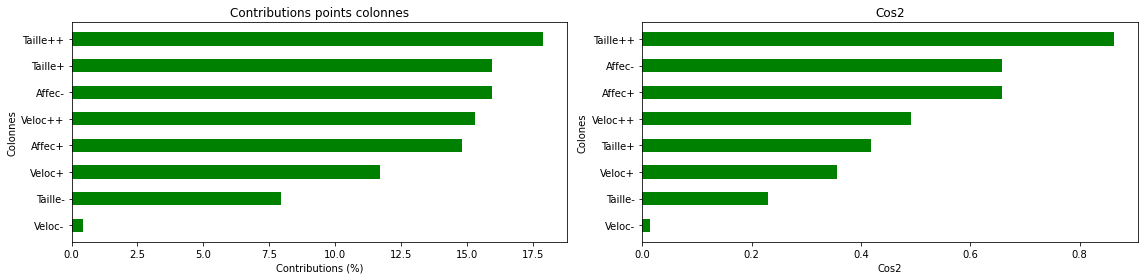

In [32]:
#TODO


### Analyse du deuxième axe

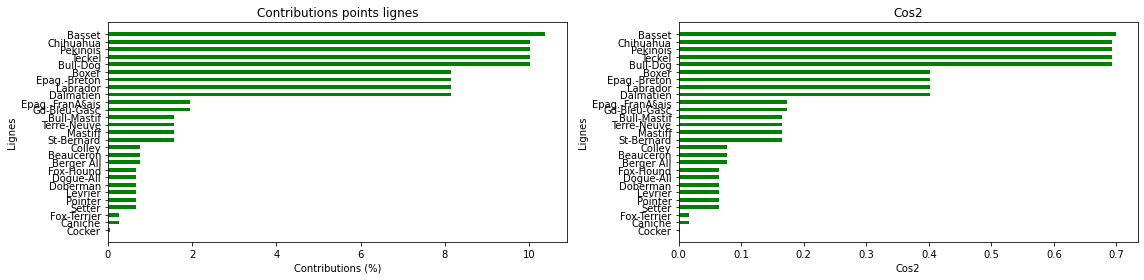

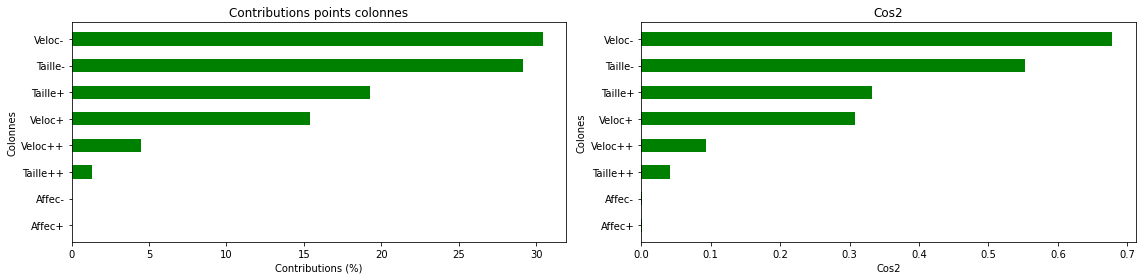

In [34]:
#TODO